Data exploration is the initial step in data analysis, whereby visual exploration is used to understand the dataset and the characteristics of the data.


Data visualization helps us to understand the data by placing it in a optical context so that our powerful visual processing centers can quickly find patterns and correlations in the data


In this project, we will explore and visualize a public domain data set regrading breaches of HIPAA confidential information.

Data breach is data leakage.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
# Load and clean the HIPAA breaches dataset using pandas
import pandas as pd
df = pd.read_csv("HIPAA-breach-report-2009-to-2017.csv")
df = df.dropna()
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


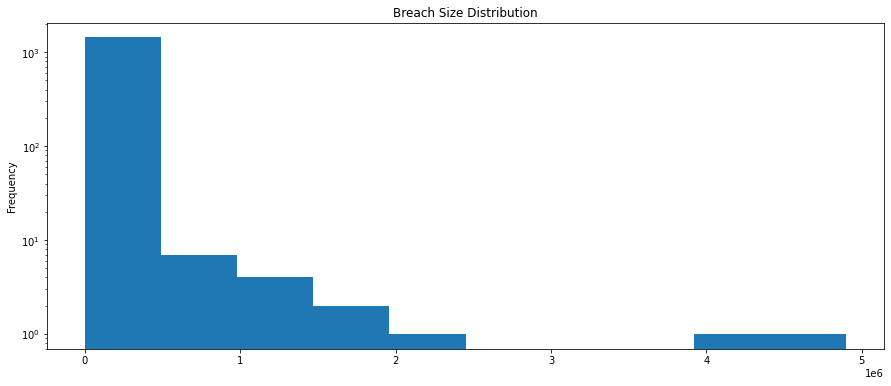

In [4]:
# We need to plot a histogram of the number of individuals who have been affected by a breach against the frequency of such breaches.
%matplotlib inline
def_fig_size = (15,6)
df["Individuals Affected"].plot(kind= "hist", figsize = def_fig_size, log=True, title= "Breach Size Distribution" )

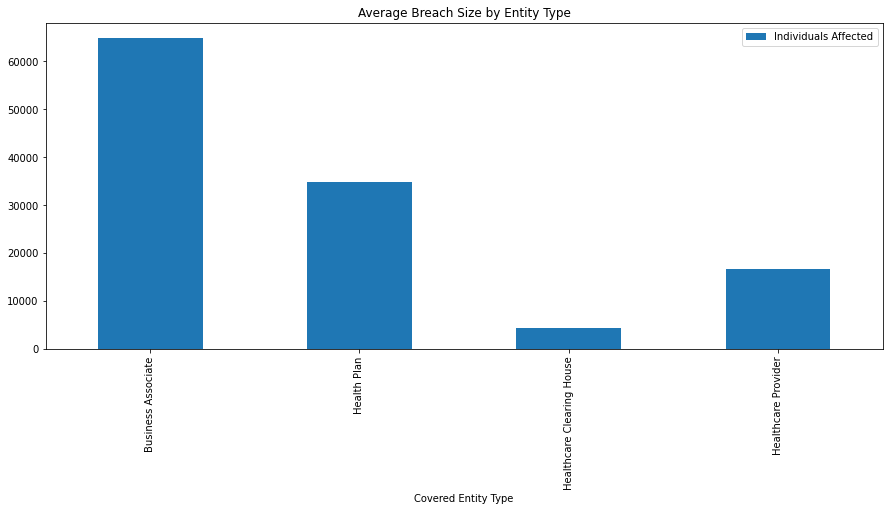

In [5]:
# Plot the average breach size based on the entity type
df.groupby("Covered Entity Type").mean().plot(
    kind= "bar", figsize = def_fig_size, title= "Average Breach Size by Entity Type"
)

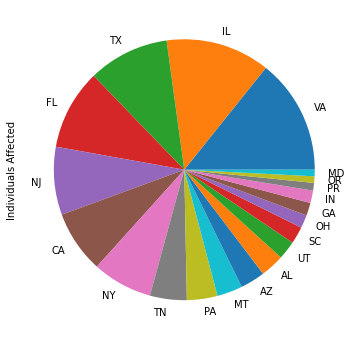

In [6]:
# We will plot a pie chart that shows the number of individuals affected by breaches per state, filtered by the top 20 state
df.groupby("State").sum().nlargest(20, "Individuals Affected").plot.pie(
    y="Individuals Affected", figsize = def_fig_size, legend=False
)

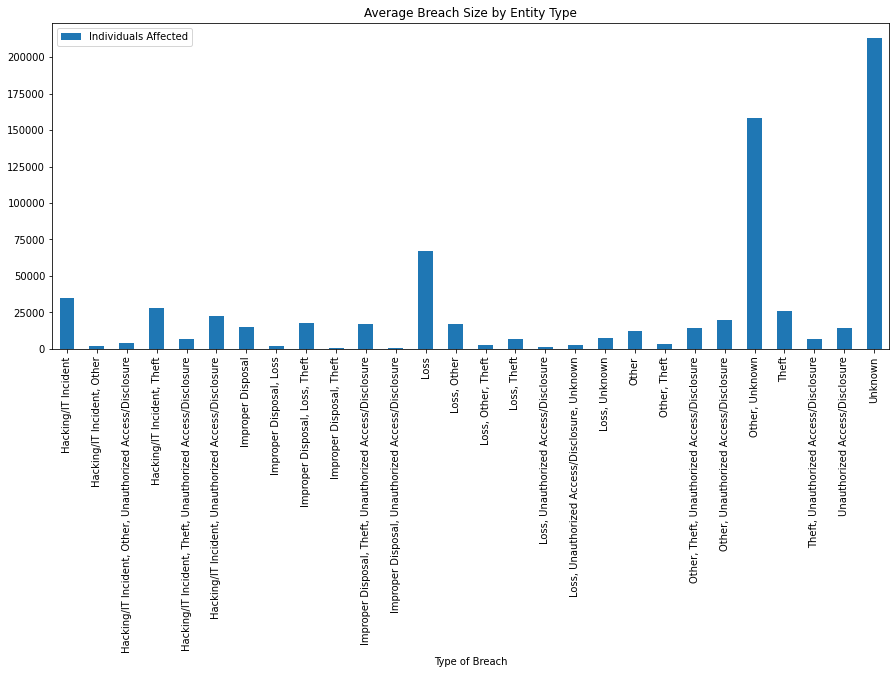

In [7]:
# We need to plot the average breach size against the type of breach (theft, loss, hacking and so on)
df.groupby("Type of Breach").mean().plot(
    kind= "bar", figsize = def_fig_size, title= "Average Breach Size by Entity Type"
)

In [8]:
# We need to instantiate a TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [9]:
# We need to fit the vectorizer to the breach descriptions and vectorize them
df["Web Description"] = df["Web Description"].str.replace("\r"," ") # We will replace \r with  " "
X = df["Web Description"].values
X_transformed = vectorizer.fit_transform(X)

In [10]:
# We will slect the 15 most important features in the data breach descriptions based on TF-IDF
import numpy as np

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X_transformed.toarray()).flatten()[::-1]
n= 15
top_n = feature_array[tfidf_sorting][:n]
print(top_n)

['this' 'review' '842' 'south' 'ransomware' 'memorial' 'specific'
 'birthdates' 'consolidated' 'malware' 'license' 'driver' 'found' 'clinic'
 'information']


In [11]:
# We will print out a couple of databreach descriptions containing the review keyword
k = 2
i=0
for x in df["Web Description"].values:
  if "review" in x:
    i += 1
    print(x)
    print()
    if i == k:
      break

A laptop was lost by an employee while in transit on public transportation.  The computer contained the protected health information of 3800 individuals.  The protected health information involved in the breach included names, Medicaid ID numbers, dates of birth, and primary physicians.  In response to this incident, the covered entity took steps to enforce the requirements of the Privacy & Security Rules.  The covered entity has installed encryption software on all employee computers, strengthened access controls including passwords, reviewed and updated security policies and procedures, and updated it risk assessment.  In addition, all employees received additional security training.   \

The covered entity's (CE) business associate (BA) incorrectly updated contract holders' addresses and mailed protected health information (PHI) to the wrong address of approximately 3,400 individuals.  The PHI involved included demographic information, explanations of benefits, clinical information,



1.  Step 1: We begin by reading the HIPAA dataset into a dataframe and ropping any rows that contain NAs

1.   Step 2: We can see that most breaches are relatively small scale but a small number of reaches are massive.

1.   Step 3: we plot breaches by sector to ensure that the largest breaches occur in Business Associates. 
2.   Step 4: Then we examine which states have the most HIPAA breaches 


2.   Step 5: We learn that the cause of the largest breaches is usually unknown


2.   Step 6 and 7: We perform NLP on the descriptions of the breaches. This will allow us to extract additional information of interest.



1.   Step 8: We can see that TF-IDF was able to find some very informative keywords such as randomware and driver

1.   Step 9: We print out breach descriptuon containing the keyword review. The word  review turns out to be an extremely important word as it appears as part of quality control and as an incidence response tool.

